In [ ]:
# call the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
print(df.shape)

(200, 5)


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#remove the missing values with NaNs
df=df.dropna(subset=['Age','Spending Score (1-100)'])
print(df.shape)

(200, 5)


Text(0, 0.5, 'Score')

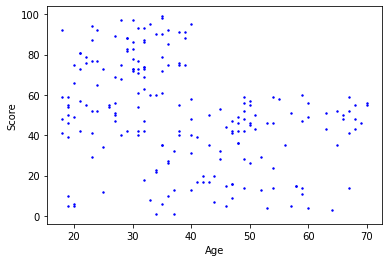

In [ ]:
#scatter plot
plt.scatter(df['Age'],df['Spending Score (1-100)'], c='blue', s=2)
plt.xlabel("Age")
plt.ylabel("Score")


In [ ]:
#For now, we'll try k value 2
k=2
X=np.array(list(zip(df['Age'],df['Spending Score (1-100)'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)


[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[[46.16521739 32.88695652]
 [28.95294118 73.62352941]]


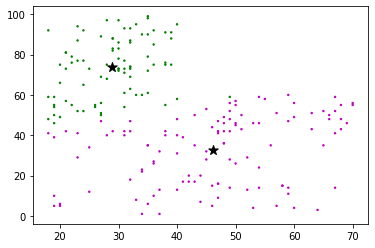

In [ ]:
#Plot the data and centroids on a scatter plot
#map the labels to colors

c=['m','g','b','r','y','c']
colors=[c[i] for i in labels]

plt.scatter(df['Age'],df['Spending Score (1-100)'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

Based on the result, we come to the following:

Shoppers under the age of 40 have a higher spending score

Shoppers over the age of 40 have a consistent spending power

In [ ]:
#Using the model that you have just trained, 
#you can use it to predict what cluster for any data pt

cluster=model.predict([[35,123]])[0]
print(c[cluster])


g


In [ ]:
#To determine the silhouette coefficient/score

from sklearn.metrics import silhouette_score

model=KMeans(n_clusters=2)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=2): {silhouette_score(X,label)}')


model=KMeans(n_clusters=3)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=3): {silhouette_score(X,label)}')


model=KMeans(n_clusters=4)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=4): {silhouette_score(X,label)}')


silhouette Score (n=2): 0.4692341232501655
silhouette Score (n=3): 0.45300127016521263
silhouette Score (n=4): 0.49973941540141753


The highest value is n=4, so the ideal cluster# is 4.

Meaning we should appeal to four different age grouping to maximize shopping incentitives.

(200, 5)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[37.28888889 50.28888889]
 [79.6        50.12727273]]
m
silhouette Score (n=2): 0.2968969162503008
silhouette Score (n=3): 0.46761358158775435
silhouette Score (n=4): 0.4931963109249047


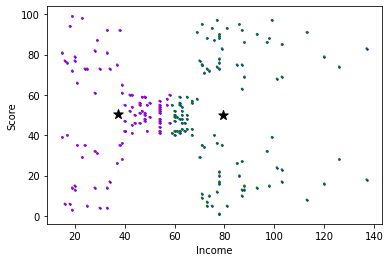

In [ ]:
df=df.dropna(subset=['Annual Income (k$)','Spending Score (1-100)'])
print(df.shape)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c='blue', s=2)
plt.xlabel("Income")
plt.ylabel("Score")
k=2
X=np.array(list(zip(df['Annual Income (k$)'],df['Spending Score (1-100)'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)
c=['m','g','b','r','y','c']
colors=[c[i] for i in labels]

plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')
cluster=model.predict([[35,123]])[0]
print(c[cluster])
from sklearn.metrics import silhouette_score

model=KMeans(n_clusters=2)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=2): {silhouette_score(X,label)}')


model=KMeans(n_clusters=3)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=3): {silhouette_score(X,label)}')


model=KMeans(n_clusters=4)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=4): {silhouette_score(X,label)}')

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [87.         18.63157895]
 [48.26       56.48      ]]


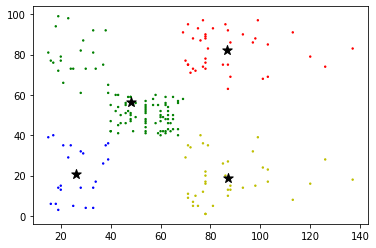

In [ ]:
k=4
X=np.array(list(zip(df['Annual Income (k$)'],df['Spending Score (1-100)'])))

kmeans=KMeans(n_clusters=k)
kmeans=kmeans.fit(X)
labels=kmeans.predict(X)
centroids=kmeans.cluster_centers_

#map the labels to colors
c=['b','r','y','g','c','m']
colors=[c[i] for i in labels]

plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=colors,s=2)
plt.scatter(centroids[:,0],centroids[:,1],marker='*',s=100,c='black')

print(centroids)


There are also four different income ranges that we should adhere are price ranges to as well.